# HOTEL BOOKING DEMAND - Descriptive Analytics and Data Visualization

## Purpose

I will only cover some basic analytics and its visualization in this notebook. I hope it somehow helps people who is also a beginner like me.

## Acknowledgement

This dataset was retrieved from https://www.kaggle.com/jessemostipak/hotel-booking-demand on August 11, 2020.

Referncing the above page, this data describes datasets with hotel demand data for two hotels. One of the hotels is a resort hotel and the other is a city hotel. Both hotels are located in Portugal: "Resort Hotel" at the resort region of Algarve and the "City Hotel" at the city of Lisbon, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

All personally identifying information has been removed from the data.

The data is originally from the article Hotel Booking Demand Datasets, written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.(https://www.sciencedirect.com/science/article/pii/S2352340918315191)

The data was downloaded and cleaned by Thomas Mock and Antoine Bichat for #TidyTuesday during the week of February 11th, 2020.

This dataset comprehends bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled. Since this is hotel real data, all data elements pertaining hotel or costumer identification were deleted. Due to the scarcity of real business data for scientific and educational purposes, these datasets can have an important role for research and education in revenue management, machine learning, or data mining, as well as in other fields.



## Variables Explanation

Explanation of the variables:
1. hotel : The name of the hotel observed (camouflaged) (H1 = Resort Hotel or H2 = City Hotel). 
2. is_canceled: Value indicating if the booking was canceled (1) or not (0)
3. lead_time: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
4. arrival_date_year: Year of arrival date
5. arrival_date_month: Month of arrival date
6. arrival_date_week_number: Week number of year for arrival date
7. arrival_date_day_of_month: Day of arrival date
8. stays_in_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
9. stays_in_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
10. adults: Number of adults
11. children: Number of children
12. babies: Number of babies
13. meal: Type of meal booked. Categories are presented in standard hospitality meal packages:	BO, BL and ML
Undefined/SC – no meal package;
BB – Bed & Breakfast;
HB – Half board (breakfast and one other meal – usually dinner);
FB – Full board (breakfast, lunch and dinner)
14. country: Country of origin. Categories are represented in the ISO 3155–3:2013 format
15. market_segment: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
16. distribution_channel: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
17. is_repeated_guest: Value indicating if the booking name was from a repeated guest (1) or not (0)
18. previous_cancellations: Number of previous bookings that were cancelled by the customer prior to the current booking
19. previous_bookings_not_canceled: Number of previous bookings not cancelled by the customer prior to the current booking
20. reserved_room_type: Code of room type reserved. Code is presented instead of designation for anonymity reasons.
21. assigned_room_type: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
22. booking_changes: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
23. deposit_type: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
24. agent: ID of the travel agency that made the booking
25. company: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
26. days_in_waiting_list: Number of days the booking was in the waiting list before it was confirmed to the customer
27. customer_type: Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group;
Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;
Transient-party – when the booking is transient, but is associated to at least other transient booking
28. adr: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
29. required_car_parking_spaces: Number of car parking spaces required by the customer
30. total_of_special_requests: Number of special requests made by the customer (e.g. twin bed or high floor)
31. reservation_status: Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed;
No-Show – customer did not check-in and did inform the hotel of the reason why
32. reservation_status_date: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

## Descriptive Analysis and Data Visualization

Let's first import the necessary libraries for doing analytics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# hotel=pd.read_csv("E:\Small Projects\Hotel Booking\hotel_bookings.csv")
hotel=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Hotel Booking Demand/hotel_bookings.csv")

In [4]:
hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [5]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


What questions can we answer from the data provided?
These are some of the questions I can think of.
1. How is the guest growth throughout the year?
2. How high is the cancellation rate? How is the trend between the two hotels monthly?
3. How is the proportion of repeated customers do they have compared to new guests?
4. Which agent made the most bookings for both hotel?
5. How is the ADR distribution? Why is there a significant outlier?
7. How is the relation between ADR and total guest?
8. How is the correlation between numeric datas?

There are actually a lot more to discover from this dataset, but I will focus more on questions which I think could be shown using different visualizations. 

### How is the number of guests growth throughout the year?

We will first make a new variable which shows month and year of the stay, to ease the visualizations of time series later on.

In [11]:
hotel["arrival_date_month_year"]=hotel["arrival_date_month"].astype("str")+" "+hotel["arrival_date_year"].astype("str")

Let's  make a new variable called "total_guest" , which is the sum of adult and children guests. I will not considered babies as individual guests.

In [12]:
hotel["total_guest"]=hotel["adults"]+hotel["children"]

In [13]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_month_year,total_guest
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,July 2015,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,July 2015,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,July 2015,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,July 2015,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,July 2015,2.0


In [14]:
guest_resort=0
guest_city=0
guest_resort_monthly=[]
guest_city_monthly=[]

for month_year in hotel["arrival_date_month_year"].unique():
  for i in range(len(hotel)):
    if (hotel["arrival_date_month_year"][i]==month_year)&(hotel["is_canceled"][i]==0)&(hotel["hotel"][i]=="Resort Hotel"):
      guest_resort+=hotel["total_guest"][i]
    elif (hotel["arrival_date_month_year"][i]==month_year)&(hotel["is_canceled"][i]==0)&(hotel["hotel"][i]=="City Hotel"):
      guest_city+=hotel["total_guest"][i]
  guest_resort_monthly.append(guest_resort)
  guest_city_monthly.append(guest_city)

In [15]:
hotel["arrival_date_month_year"].unique()

array(['July 2015', 'August 2015', 'September 2015', 'October 2015',
       'November 2015', 'December 2015', 'January 2016', 'February 2016',
       'March 2016', 'April 2016', 'May 2016', 'June 2016', 'July 2016',
       'August 2016', 'September 2016', 'October 2016', 'November 2016',
       'December 2016', 'January 2017', 'February 2017', 'March 2017',
       'April 2017', 'May 2017', 'June 2017', 'July 2017', 'August 2017'],
      dtype=object)

In [16]:
guestdf=pd.DataFrame(list(zip(hotel["arrival_date_month_year"].unique(),guest_resort_monthly, guest_city_monthly)), columns=["Month_Year","Total Guest Resort Hotel", "Total Guest City Hotel"])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 <a list of 26 Text major ticklabel objects>)

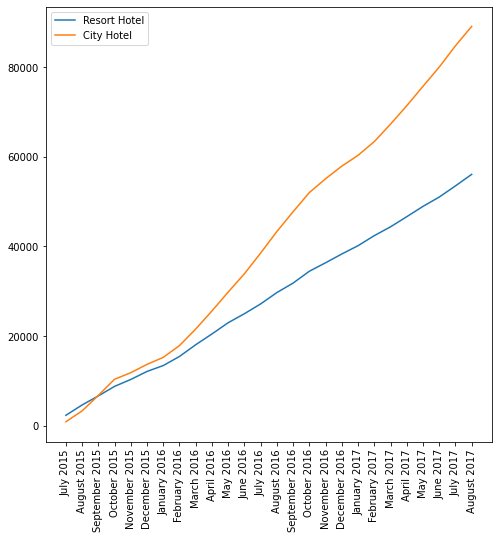

In [17]:
plt.figure(figsize=(8,8))
plt.plot(guestdf["Month_Year"], guestdf["Total Guest Resort Hotel"])
plt.plot(guestdf["Month_Year"], guestdf["Total Guest City Hotel"])
plt.legend(["Resort Hotel","City Hotel"])
plt.xticks(rotation=90)

The graph shows that the growth of City Hotel in terms of total guest (adult, children, and babies summed up) is faster than Resort Hotel's, quite significantly starting around February 2016. 

### How high is the cancellation rate? How is the trend between the two hotels monthly?


In [18]:
resort_cancel_sizes=hotel[hotel["hotel"]=="Resort Hotel"]["is_canceled"].value_counts()

In [19]:
city_cancel_sizes=hotel[hotel["hotel"]=="City Hotel"]["is_canceled"].value_counts()

In [20]:
cancel_sizes=hotel["is_canceled"].value_counts()

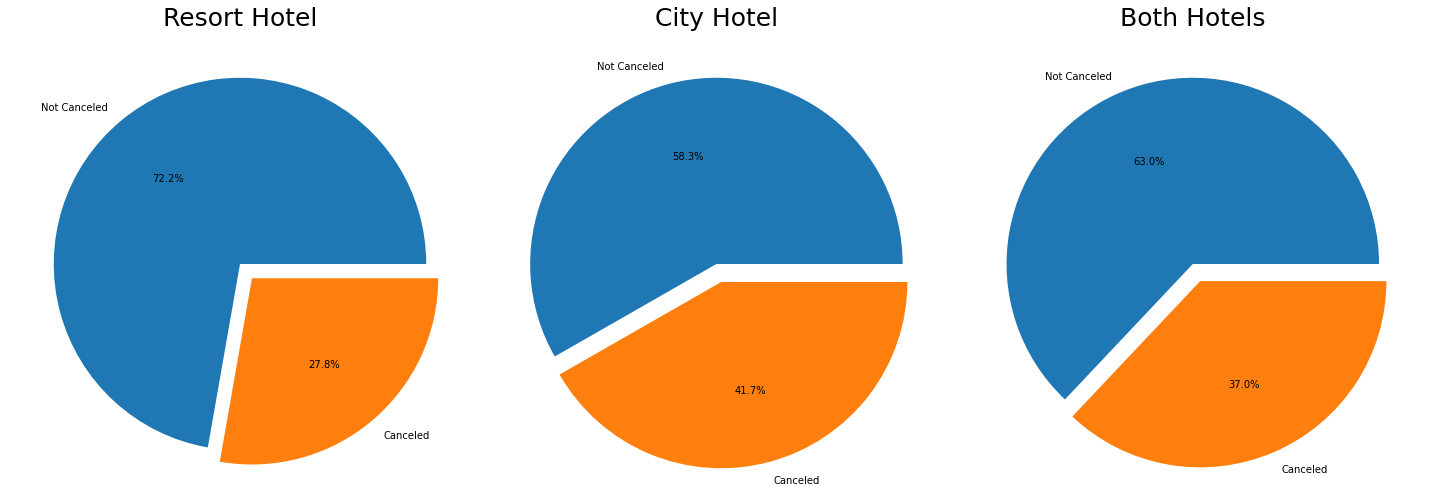

In [21]:
plt.figure(figsize=(20,20))

plt.subplot(1,3,1)
plt.pie(resort_cancel_sizes,labels=["Not Canceled","Canceled"], explode=[0, 0.1], autopct='%1.1f%%')
plt.title("Resort Hotel", fontsize=25)

plt.subplot(1,3,2)
plt.pie(city_cancel_sizes,labels=["Not Canceled","Canceled"], explode=[0, 0.1], autopct='%1.1f%%')
plt.title("City Hotel", fontsize=25)

plt.subplot(1,3,3)
plt.pie(cancel_sizes,labels=["Not Canceled","Canceled"], explode=[0, 0.1], autopct='%1.1f%%')
plt.title("Both Hotels", fontsize=25)

plt.tight_layout()

It seems that the cancellation rate for City Hotel is pretty high compared to the Resort Hotel.

In [ ]:
hotel["arrival_date_month_year"].unique()

array(['July 2015', 'August 2015', 'September 2015', 'October 2015',
       'November 2015', 'December 2015', 'January 2016', 'February 2016',
       'March 2016', 'April 2016', 'May 2016', 'June 2016', 'July 2016',
       'August 2016', 'September 2016', 'October 2016', 'November 2016',
       'December 2016', 'January 2017', 'February 2017', 'March 2017',
       'April 2017', 'May 2017', 'June 2017', 'July 2017', 'August 2017'],
      dtype=object)

In [22]:
pct_resort=[]
pct_city=[]

for month_year in hotel["arrival_date_month_year"].unique():
  count0_resort=0
  count1_resort=0
  count0_city=0
  count1_city=0
  for i in range(len(hotel)):
    if (hotel["is_canceled"][i]==0)&(hotel["arrival_date_month_year"][i]==month_year)&(hotel["hotel"][i]=="Resort Hotel"):
      count0_resort+=1
    elif (hotel["is_canceled"][i]==1)&(hotel["arrival_date_month_year"][i]==month_year)&(hotel["hotel"][i]=="Resort Hotel"):
      count1_resort+=1
    if (hotel["is_canceled"][i]==0)&(hotel["arrival_date_month_year"][i]==month_year)&(hotel["hotel"][i]=="City Hotel"):
      count0_city+=1
    elif (hotel["is_canceled"][i]==1)&(hotel["arrival_date_month_year"][i]==month_year)&(hotel["hotel"][i]=="City Hotel"):
      count1_city+=1  
  pct_resort.append(count1_resort/(count0_resort+count1_resort)*100)
  pct_city.append(count1_city/(count0_city+count1_city)*100)

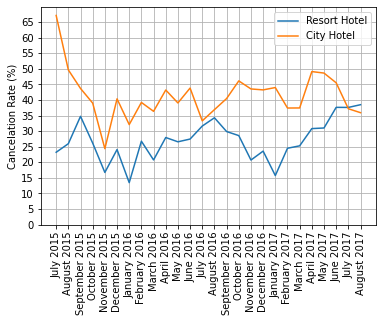

In [ ]:
plt.plot(hotel["arrival_date_month_year"].unique(),pct_resort)
plt.plot(hotel["arrival_date_month_year"].unique(),pct_city)
plt.legend(["Resort Hotel","City Hotel"])
plt.xticks(rotation=90)
plt.yticks(np.arange(0,70, step=5))
plt.ylabel("Cancelation Rate (%)")
plt.grid()

...however cancelation rate for Resort Hotel tends to increase while City Hotel's decreasing!

### How is the proportion of repeated customers do they have compared to new guests?


In [ ]:
hotel["is_repeated_guest"].value_counts()

0    115580
1      3810
Name: is_repeated_guest, dtype: int64

Text(0.5, 1.0, 'Proportion of Repeated Guests')

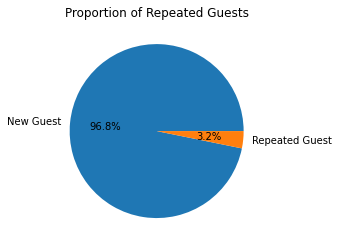

In [23]:
plt.pie(hotel["is_repeated_guest"].value_counts(), labels=["New Guest","Repeated Guest"],autopct='%1.1f%%')
plt.title ("Proportion of Repeated Guests")

We can see that there are only 3.2% of the customers are repeated customers. I would also like to check where are these repeated customers came from.

In [ ]:
repeated=pd.DataFrame(hotel[hotel["is_repeated_guest"]==1].groupby("country").count()["hotel"].sort_values(ascending=False))

In [ ]:
repeated.reset_index(inplace=True)

In [ ]:
repeated

,country,hotel
0,PRT,3250
1,GBR,107
2,ESP,90
3,FRA,78
4,ITA,40
5,IRL,31
6,DEU,25
7,NLD,20
8,USA,19
9,AGO,18


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text major ticklabel objects>)

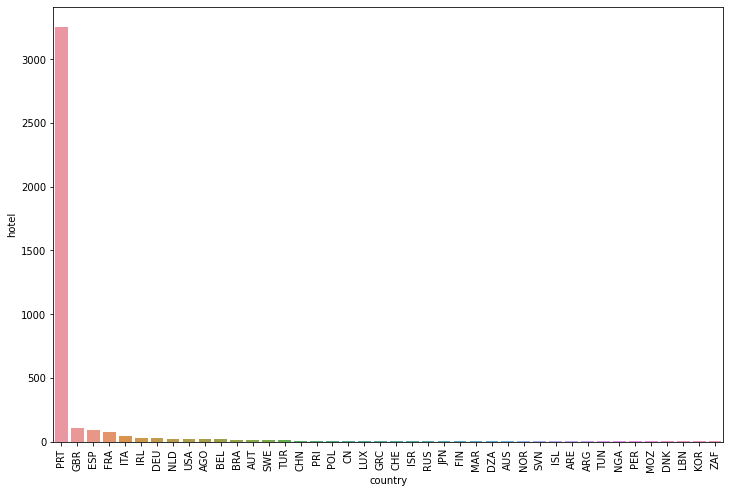

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x="country", y="hotel", data=repeated)
plt.xticks(rotation=90)

It seems a lot of the repeated guests are from PRT. Are these repeated guests from travel agents? Or are they individual repeated customers?

In [ ]:
hotel[hotel["is_repeated_guest"]==1].groupby("country")["customer_type"].value_counts()["PRT"]

customer_type
Transient          2638
Transient-Party     476
Group               116
Contract             20
Name: customer_type, dtype: int64

Interesting that most of them are from Transient bookings! Since they voluntarily repeatedly come back to the same hotel, could  mean that they were satisfied on their first visit.

let's also compare the datas between the two hotels!

In [ ]:
hotel[(hotel["is_repeated_guest"]==1) & (hotel["hotel"]=="Resort Hotel")].groupby("country")["customer_type"].value_counts()

country  customer_type  
AGO      Transient             3
AUS      Group                 1
AUT      Transient-Party       3
         Group                 1
BEL      Transient             6
         Transient-Party       1
BRA      Transient             5
         Group                 2
CHE      Transient             2
CHN      Transient             6
CN       Transient             5
DEU      Transient             4
         Transient-Party       2
ESP      Transient            36
         Group                 1
FIN      Transient             2
FRA      Transient            14
         Group                 1
         Transient-Party       1
GBR      Transient            49
         Transient-Party      16
         Group                15
         Contract             12
IRL      Transient            24
         Group                 2
         Transient-Party       2
ISL      Transient             1
ITA      Transient-Party      12
         Transient             9
         Group    

In [ ]:
hotel[(hotel["is_repeated_guest"]==1) & (hotel["hotel"]=="Resort Hotel")].groupby("country")["customer_type"].value_counts()["PRT"]

customer_type
Transient          1251
Transient-Party     150
Group                86
Contract              7
Name: customer_type, dtype: int64

In [ ]:
hotel[(hotel["is_repeated_guest"]==1) & (hotel["hotel"]=="City Hotel")].groupby("country")["customer_type"].value_counts()["PRT"]

customer_type
Transient          1387
Transient-Party     326
Group                30
Contract             13
Name: customer_type, dtype: int64

Interesting! it seems both of the hotels have equally good reputation that they have non-tour-related repeated guests...

Let's further visualize the data.

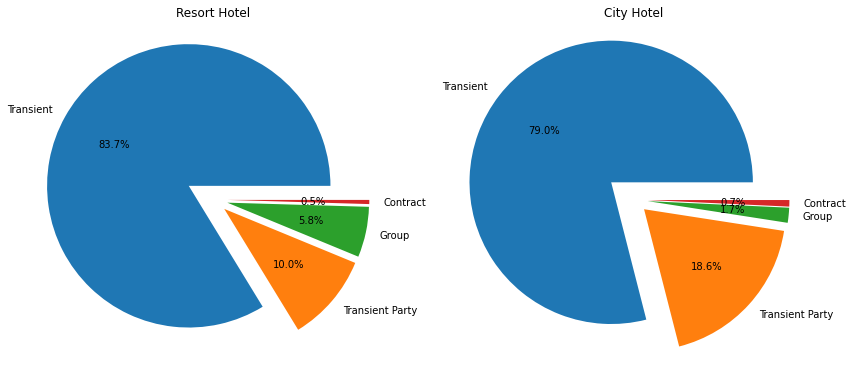

In [ ]:
plt.figure(figsize=(12,12))

plt.subplot(1,2,1)
plt.pie(hotel[(hotel["is_repeated_guest"]==1) & (hotel["hotel"]=="Resort Hotel")].groupby("country")["customer_type"].value_counts()["PRT"],labels=["Transient","Transient Party","Group","Contract"],autopct='%1.1f%%', explode=[0.2,0.1,0.1,0.1])
plt.title("Resort Hotel")

plt.subplot(1,2,2)
plt.pie(hotel[(hotel["is_repeated_guest"]==1) & (hotel["hotel"]=="City Hotel")].groupby("country")["customer_type"].value_counts()["PRT"], labels=["Transient","Transient Party","Group","Contract"],autopct='%1.1f%%', explode=[0.2,0.1,0.1,0.1])
plt.title("City Hotel")

plt.tight_layout()

Both hotels have 90% voluntary repeated customer out of the overall repeated customer from PRT!

### Which agent made the most bookings for both hotel? Does it change throughout the year?


In [ ]:
hotel[hotel["is_canceled"]==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75166 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           75166 non-null  object 
 1   is_canceled                     75166 non-null  int64  
 2   lead_time                       75166 non-null  int64  
 3   arrival_date_year               75166 non-null  int64  
 4   arrival_date_month              75166 non-null  object 
 5   arrival_date_week_number        75166 non-null  int64  
 6   arrival_date_day_of_month       75166 non-null  int64  
 7   stays_in_weekend_nights         75166 non-null  int64  
 8   stays_in_week_nights            75166 non-null  int64  
 9   adults                          75166 non-null  int64  
 10  children                        75166 non-null  float64
 11  babies                          75166 non-null  int64  
 12  meal                           

In [ ]:
hotel[hotel["is_canceled"]==0].groupby("agent").count()["hotel"].sort_values(ascending=False).head(10)

agent
9.0      18697
240.0     8438
7.0       3065
14.0      2988
250.0     2357
6.0       2265
1.0       1911
28.0      1556
241.0     1485
8.0       1087
Name: hotel, dtype: int64

In [ ]:
agent_grouping=pd.DataFrame(hotel[hotel["is_canceled"]==0].groupby("agent").count()["hotel"].sort_values(ascending=False).head(5))
agent_2015=pd.DataFrame(hotel[(hotel["is_canceled"]==0)&(hotel["arrival_date_year"]==2015)].groupby("agent").count()["hotel"].sort_values(ascending=False).head(5))
agent_2016=pd.DataFrame(hotel[(hotel["is_canceled"]==0)&(hotel["arrival_date_year"]==2016)].groupby("agent").count()["hotel"].sort_values(ascending=False).head(5))
agent_2017=pd.DataFrame(hotel[(hotel["is_canceled"]==0)&(hotel["arrival_date_year"]==2017)].groupby("agent").count()["hotel"].sort_values(ascending=False).head(5))

agent_grouping.reset_index(inplace=True)
agent_2015.reset_index(inplace=True)
agent_2016.reset_index(inplace=True)
agent_2017.reset_index(inplace=True)

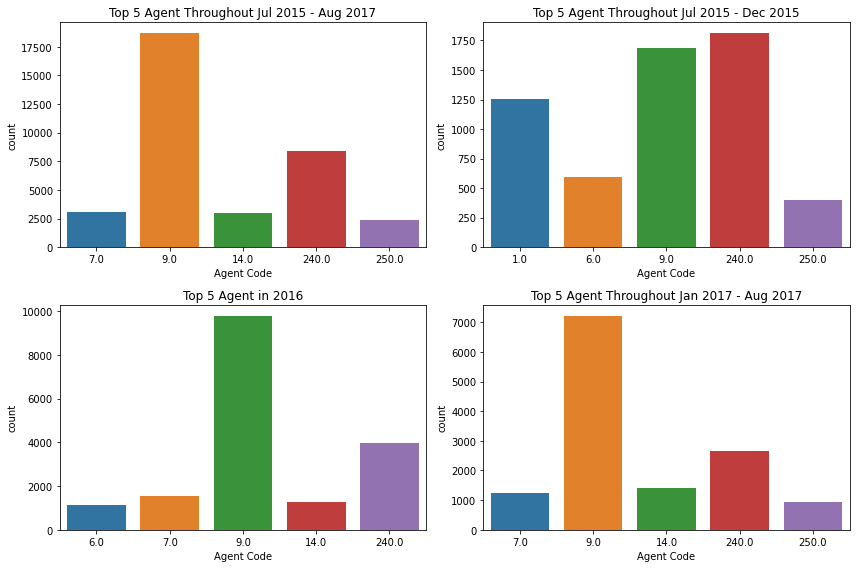

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.barplot(x=agent_grouping["agent"].unique(),y=hotel[hotel["is_canceled"]==0].groupby("agent").count()["hotel"].sort_values(ascending=False).head(5))
plt.title("Top 5 Agent Throughout Jul 2015 - Aug 2017")
plt.ylabel("count")
plt.xlabel("Agent Code")

plt.subplot(2,2,2)
sns.barplot(x=agent_2015["agent"].unique(),y=hotel[(hotel["is_canceled"]==0)&(hotel["arrival_date_year"]==2015)].groupby("agent").count()["hotel"].sort_values(ascending=False).head(5))
plt.title("Top 5 Agent Throughout Jul 2015 - Dec 2015")
plt.ylabel("count")
plt.xlabel("Agent Code")

plt.subplot(2,2,3)
sns.barplot(x=agent_2016["agent"].unique(),y=hotel[(hotel["is_canceled"]==0)&(hotel["arrival_date_year"]==2016)].groupby("agent").count()["hotel"].sort_values(ascending=False).head(5))
plt.title("Top 5 Agent in 2016")
plt.ylabel("count")
plt.xlabel("Agent Code")

plt.subplot(2,2,4)
sns.barplot(x=agent_2017["agent"].unique(),y=hotel[(hotel["is_canceled"]==0)&(hotel["arrival_date_year"]==2017)].groupby("agent").count()["hotel"].sort_values(ascending=False).head(5))
plt.title("Top 5 Agent Throughout Jan 2017 - Aug 2017")
plt.ylabel("count")
plt.xlabel("Agent Code")

plt.tight_layout()

We can understand from the graph above that agent "9" consistently contributed a lot (if not most) yearly throughout the period of Jul 2015 - Aug 2017. We can also see that agent "240" contributed a bit more than agent "9" during Jul 2015 - Dec 2015. However, on the other periods the contribution gap are pretty big.

### How is the ADR distribution? Why is there a significant outlier?

In [ ]:
hotel["adr"].describe()

count    119390.000000
mean        101.831122
std          50.535790
min          -6.380000
25%          69.290000
50%          94.575000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

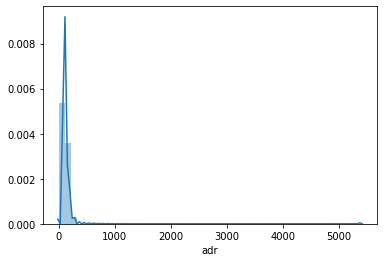

In [ ]:
sns.distplot(hotel["adr"])

It seems that the distribution is positively skewed, which means that the data distribution is concentrated on the lower values. Here, I would like to try check further on the outliers by using boxplot.

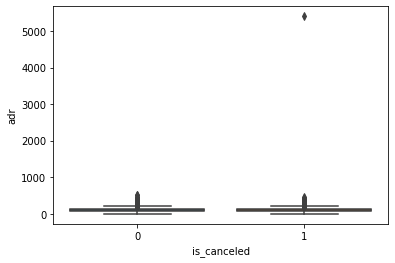

In [ ]:
sns.boxplot(x="is_canceled", y="adr", data=hotel)

It seems there is one value which is very high compared to the other values. Based on the describe() data we have made previously, we can safely assume that is the max value (which is very far even from the value of Q3 ("75%").

In [ ]:
hotel[hotel["adr"]==hotel["adr"].describe()["max"]]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
48515,City Hotel,1,35,2016,March,13,25,0,1,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,1,Non Refund,12.0,NaN,0,Transient,5400.0,0,0,Canceled,2016-02-19


Since the other piece of information seems to be normal booking (2 adults, for 1 ngiht), could this specific outlier caused by system error? Let's try delete this specific data and see how it affects the distribution.

In [ ]:
adr_deletmax=hotel[hotel["adr"]!=5400]

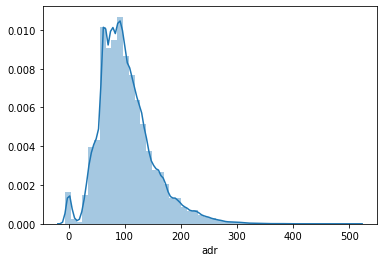

In [ ]:
sns.distplot(adr_deletmax["adr"])

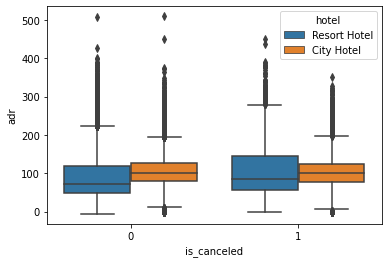

In [ ]:
sns.boxplot(x="is_canceled", y="adr", hue="hotel", data=adr_deletmax)

It seems that one specific data was a human/system error, since it was only 1 data out of this huge dataset.

### How is the relation between ADR and total guest?

In [64]:
hotel.groupby("arrival_date_month_year").sum()["adr"]

arrival_date_month_year
April 2016        482651.90
April 2017        630470.68
August 2015       411934.11
August 2016       723470.27
August 2017       808923.22
December 2015     216311.39
December 2016     333389.15
February 2016     272767.93
February 2017     320893.87
January 2016      145597.69
January 2017      271574.11
July 2015         271588.06
July 2016         573715.30
July 2017         759959.67
June 2016         566123.95
June 2017         710153.16
March 2016        381430.43
March 2017        408746.02
May 2016          528075.29
May 2017          753553.54
November 2015     141757.79
November 2016     359605.18
October 2015      391084.63
October 2016      589978.46
September 2015    484902.64
September 2016    618959.16
Name: adr, dtype: float64

In [38]:
hotel.groupby("arrival_date_year_month").sum()["total_guest"]

arrival_date_year_month
2015 August        7964.0
2015 December      5424.0
2015 July          5689.0
2015 November      3786.0
2015 October       9052.0
2015 September     9695.0
2016 April        10447.0
2016 August       11519.0
2016 December      7694.0
2016 February      7188.0
2016 January       3812.0
2016 July         10042.0
2016 June         10060.0
2016 March         9227.0
2016 May          10388.0
2016 November      7981.0
2016 October      11930.0
2016 September    10584.0
2017 April        11500.0
2017 August       11083.0
2017 February      8052.0
2017 January       6664.0
2017 July         11755.0
2017 June         11350.0
2017 March         9148.0
2017 May          11996.0
Name: total_guest, dtype: float64

In [30]:
hotel["arrival_date_year_month"].unique()

array(['2015 July', '2015 August', '2015 September', '2015 October',
       '2015 November', '2015 December', '2016 January', '2016 February',
       '2016 March', '2016 April', '2016 May', '2016 June', '2016 July',
       '2016 August', '2016 September', '2016 October', '2016 November',
       '2016 December', '2017 January', '2017 February', '2017 March',
       '2017 April', '2017 May', '2017 June', '2017 July', '2017 August'],
      dtype=object)

In [ ]:
for month_year in hotel["arrival_date_month_year"]:
  sum_adr=0
  sum_guest=0
  for i in range(len(hotel)):
    if hotel["arrival_date_month_year"][i]==month_year:
      sum_adr+=hotel["adr"][i]
      sum_guest+=hotel["total_guest"][i]

In [ ]:
plt.plot(x=hotel["arrival_date_year_month"].unique(), y=sum_adr)

plt.plot(x=hotel["arrival_date_year_month"].unique(), y=sum_guest)

Text(0.5, 1.0, 'Relation Between ADR and Total Guest')

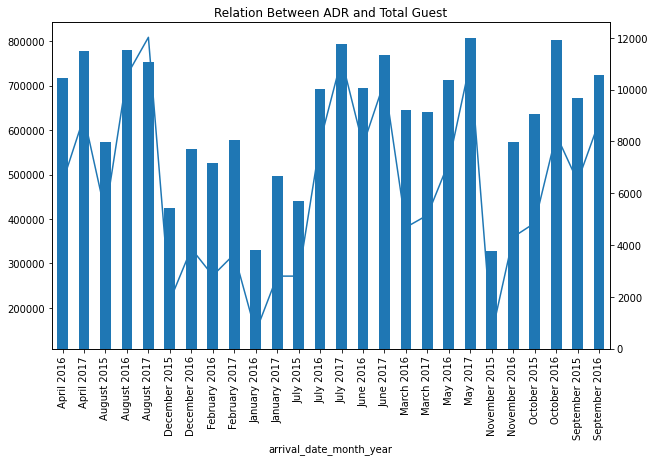

In [63]:
fig,ax1=plt.subplots(figsize=(10,6))

hotel.groupby("arrival_date_month_year").sum()["adr"].plot(ax=ax1)
plt.xticks(rotation=90)

ax2=ax1.twinx()
hotel.groupby("arrival_date_month_year").sum()["total_guest"].plot(kind="bar", ax=ax2)


plt.title("Relation Between ADR and Total Guest")


### How is the correlation between numerical datas?

In [ ]:
hotel.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_guest
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658,0.046506
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712,0.072279
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531,0.052152
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149,0.025216
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062,0.006758
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671,0.101439
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192,0.101670
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884,0.821102
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745,0.579373
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889,0.162690


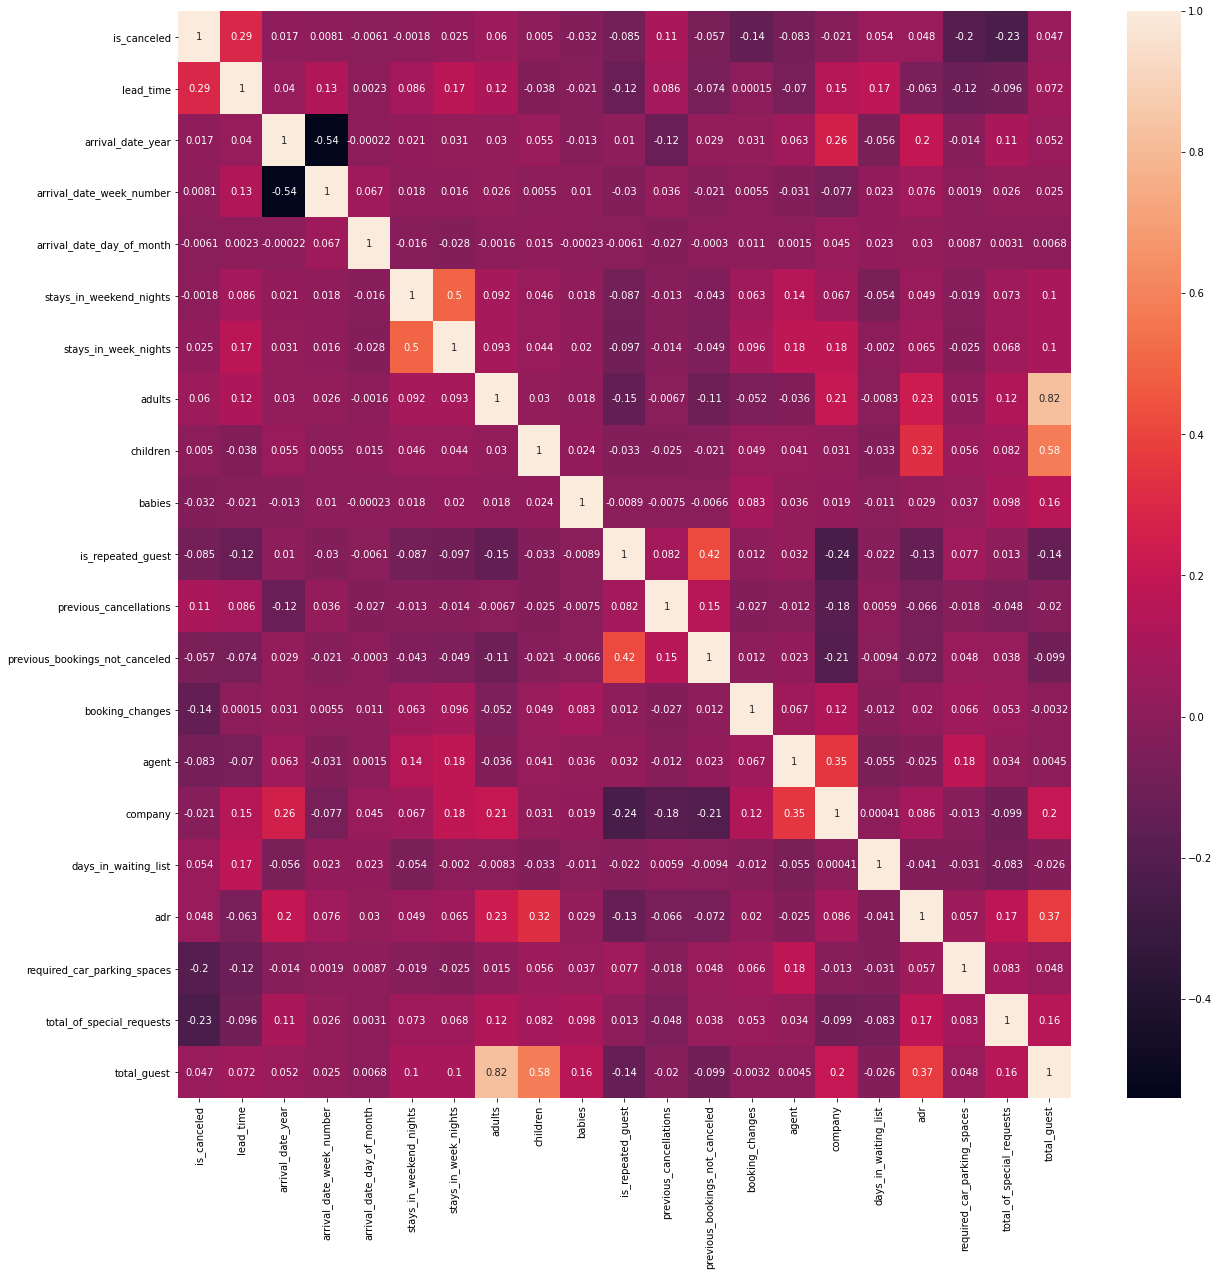

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(hotel.corr(),annot=True)

Based on the heatmap, there are no really significant variables which correlated with each other. The highest variables correlated are between adults and total_guest and between children and total_guest, which make sense since total_guest was our made up variable constituted of adults, children, and babies variables.